In [1]:
import sys
#print(sys.path)
#sys.path.remove('/work/projects/project01456/lent/cases/scripts/modules')
print(sys.path)
import dataframeWithMetadata as dfmd
import dataAgglomeration as da
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.lines import Line2D
import numpy as np
rcParams["figure.dpi"] = 400
#sys.path.append(os.environ['ARGO_PYTHON_MODULES'])
#if (not(os.path.exists('figures'))):
#    os.mkdir('figures')

idx = pd.IndexSlice


['/transfer/Jun/rebuttle-TwoPhaseFlow/run/rhoVoF/translatingDropletInQuiescentFluid2D', '', '/home/local/CSI/jl95muce/.local/lib/python3.8/site-packages', '/transfer/Jun/rebuttle-TwoPhaseFlow/run/rhoVoF/translatingDropletInQuiescentFluid2D', '/home/local/CSI/jl95muce/transfer_Jun/argo/cases/scripts/modules', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '/home/local/CSI/jl95muce/.local/lib/python3.9/site-packages', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages']


In [3]:
def plot_conservation_Euler_upwind(dframe,col,title):

    rcParams["figure.dpi"] = 400    
    timeSchemes = dframe.index.get_level_values("timeSchemes").unique()
    fluxSchemes = dframe.index.get_level_values("fluxSchemes").unique()
    #dframe=dframe.loc[idx[divScheme]]
    resolutions = dframe.index.get_level_values("resolution").unique()

    for resolution in resolutions: 
            df_subset = dframe.loc[timeSchemes[0],fluxSchemes[0],resolution]
            Sum = df_subset[col]
            Sum0 = Sum[0]
            plt.plot(df_subset["time"], (Sum-Sum0) / Sum0, 
                         label=" Euler+upwind; N%s" % (resolution))
   # plt.title(title)
    plt.ylabel(title)
    plt.xlabel("Time in seconds")
    plt.ylim(-1e-17,1e-17)
    #plt.yscale('symlog')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)

def plot_schemes_dframe(dframe,col,title,ylimBottom,ylimTop,yreclim,setYlimL, setYlimR, scalar="linear", recWidth=0, extraticks=[]):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""
    
    rcParams["figure.dpi"] = 400
    timeSchemes = ["Euler", "CrankNicolson"]#dframe.index.get_level_values("timeSchemes").unique()
    fluxSchemes = ["upwind", "cubic","limitedLinearV","linear","LUST","MUSCL", "QUICK", "SuperBee", "vanLeer"]
    resolutions = [64]#dframe.index.get_level_values("resolution").unique()
    # Create the main figure and axis
    fig, ax = plt.subplots()
    
    # Create a zoomed-in subfigure
    sub_ax = plt.axes([1.03, 0.3, 0.4, 0.4])  # [left, bottom, width, height]


    #print(CFLs)
    #CFLs=[0.005, 0.01, 0.05, 0.1]
    #resolution = 32
    #v = 0.01
    for resolution in resolutions:
        for timeScheme in timeSchemes:
            for fluxScheme in fluxSchemes:
                if (timeScheme == "Euler") | ((timeScheme == "CrankNicolson") & (fluxScheme == "upwind")):
                    df_subset = dframe.loc[timeScheme,fluxScheme]#,resolution]
                    if title == "Surface area Error":
                        sph = df_subset[col]#["sphericity"]
                        #sumAlpha0 = sumAlpha[0]
                        if((timeScheme == "CrankNicolson") & (fluxScheme == "upwind")):
                            ax.plot(df_subset["time"], np.absolute(sph-sph[0]), marker="o",markersize=3,#markevery=70,
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                        else:
                            ax.plot(df_subset["time"], np.absolute(sph-sph[0]), 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
#                         ax.plot(df_subset["time"], sph-sph[0], 
#                                      label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                        sub_ax.plot(df_subset["time"], np.absolute(sph-sph[0]), #(sph-sph[0])/sph[0], 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                    elif title == "Normalized Momentum Error":
                        #MOMx=df_subset["MOMx"]
                        #MOMy=df_subset["MOMy"]
                        #MOMz=df_subset["MOMz"]
                        #MOM=((MOMx)**2+(MOMy)**2+(MOMz)**2)**0.5
                        MOM=df_subset["SumKinE3"]
                        #MOM0=((MOMx[0])**2+(MOMy[0])**2+(MOMz[0])**2)**0.5
                        #sumAlpha = df_subset[col]
                        #sumAlpha0 = sumAlpha[0]
                        ax.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0, 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                        sub_ax.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],
                                   label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0)
                    else:
                        sumAlpha = df_subset[col]
                        sumAlpha0 = sumAlpha[0]
                        ax.plot(df_subset["time"], (sumAlpha-sumAlpha0) / sumAlpha0, 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                        sub_ax.plot(df_subset["time"], (sumAlpha-sumAlpha0) / sumAlpha0, 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                    #axes = plt.axes([.96, .96, .30, .30])
                #axes.plot(df_subset["time"],(sumAlpha-sumAlpha0) / sumAlpha0, c='green', lw=1)
    
    sub_ax.set_xlim(left=0.09)
    sub_ax.set_ylim(ylimBottom,ylimTop)
    sub_ax.set_yscale(scalar)
    sub_ax.set_yticks(list(sub_ax.get_yticks()) + extraticks)
    ### set special legend for zoomed-in 
    #legend = sub_ax.legend()

    # Get the handles and labels from the legend
    handles, labels = sub_ax.get_legend_handles_labels()#legend.get_handles_labels()
    
    # Create a new list to store modified labels
    modified_handles=[]
    modified_labels = []

    # Iterate over the handles and labels
    for handle, label in zip(handles, labels):
        # Get the x-data from the handle
        xdata = handle.get_xdata()
        ydata = handle.get_ydata()

        # Check if any x-data is within the x-limits
        if any((x >= sub_ax.get_xlim()[0]) and (x <= sub_ax.get_xlim()[1]) and (y >= sub_ax.get_ylim()[0]) and (y <= sub_ax.get_ylim()[1]) for x, y in zip(xdata,ydata)):#for x in xdata):
            modified_labels.append(label)
            modified_handles.append(handle)

    sub_ax.legend(modified_handles, modified_labels,loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)

    ax.set_ylabel(title)
    ax.set_xlabel("Time in seconds")
    #plt.yscale('log')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    if recWidth==0:
        rect = patches.Rectangle((0.09, -yreclim), 0.02, 2*yreclim, linestyle='dashed', edgecolor='black', facecolor='none')
    else:
        rect = patches.Rectangle((0.09, -yreclim), 0.02, recWidth, linestyle='dashed', edgecolor='black', facecolor='none')
    
    ax.add_patch(rect)
    
    top_left=[1.03, 0.7]
    bottom_left=[1.03, 0.3]
    
    ax.set_xlim(0, 0.118)
    ax.set_ylim(setYlimL, setYlimR) #(-1e-6, 1.42e-5)
    ax.set_yscale(scalar)

    #adjust box in case the center deviates from zero
    if recWidth==0:
        top_right=ax.transData.transform((0.11, yreclim))
    else:
        top_right=ax.transData.transform((0.11, recWidth-yreclim))

    top_right=fig.transFigure.inverted().transform(top_right)
    bottom_right=ax.transData.transform((0.11, -yreclim))
    bottom_right=fig.transFigure.inverted().transform(bottom_right)
    
    line1 = Line2D((top_right[0], top_left[0]),(top_right[1], top_left[1]), transform=fig.transFigure, color='gray',alpha=0.5)#, linestyle='dashed')
    line2 = Line2D((bottom_right[0], bottom_left[0]),(bottom_right[1], bottom_left[1]), transform=fig.transFigure, color='gray',alpha=0.5)#, linestyle='dashed')

    # Add the line to the figure
    fig.add_artist(line1)
    fig.add_artist(line2)
    
    # Show the plot
    plt.show()

In [4]:
def plot_schemes_ratio1_dframe(dframe,col,title,setYlimL, setYlimR, scalar="linear"):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""
    
    rcParams["figure.dpi"] = 400
    timeSchemes = ["Euler", "CrankNicolson"]#dframe.index.get_level_values("timeSchemes").unique()
    fluxSchemes = ["upwind", "cubic","limitedLinearV","linear","LUST","MUSCL", "QUICK", "SuperBee", "vanLeer"]
    resolutions = [64]#dframe.index.get_level_values("resolution").unique()
    # Create the main figure and axis
    fig, ax = plt.subplots()
    
    # Create a zoomed-in subfigure
    #sub_ax = plt.axes([1, 0.3, 0.4, 0.4])  # [left, bottom, width, height]


    #print(CFLs)
    #CFLs=[0.005, 0.01, 0.05, 0.1]
    #resolution = 32
    #v = 0.01
    for resolution in resolutions:
        for timeScheme in timeSchemes:
            for fluxScheme in fluxSchemes:
                if (timeScheme == "Euler") | ((timeScheme == "CrankNicolson") & (fluxScheme == "upwind")):
                    df_subset = dframe.loc[timeScheme,fluxScheme]#,resolution]
                    if title == "Spericity Error":
                        sph = df_subset[col]#["sphericity"]
                        #sumAlpha0 = sumAlpha[0]
                        ax.plot(df_subset["time"], sph-sph[0], 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
#                         sub_ax.plot(df_subset["time"], sph-sph[0], 
#                                      label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                    elif title == "Normalized Momentum Error":
#                         MOMx=df_subset["MOMx"]
#                         MOMy=df_subset["MOMy"]
#                         MOMz=df_subset["MOMz"]
#                         MOM=((MOMx)**2+(MOMy)**2+(MOMz)**2)**0.5
                        MOM=df_subset["SumKinE3"]
                        #MOM0=((MOMx[0])**2+(MOMy[0])**2+(MOMz[0])**2)**0.5
                        #sumAlpha = df_subset[col]
                        #sumAlpha0 = sumAlpha[0]
                        ax.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0, 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
#                         sub_ax.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],
#                                    label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0)
                    else:
                        sumAlpha = df_subset[col]
                        sumAlpha0 = sumAlpha[0]
                        ax.plot(df_subset["time"], (sumAlpha-sumAlpha0) / sumAlpha0, 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
#                         sub_ax.plot(df_subset["time"], (sumAlpha-sumAlpha0) / sumAlpha0, 
#                                      label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
#                     #axes = plt.axes([.96, .96, .30, .30])
                #axes.plot(df_subset["time"],(sumAlpha-sumAlpha0) / sumAlpha0, c='green', lw=1)
    
#     sub_ax.set_xlim(left=0.07)
#     sub_ax.set_ylim(-ylim, ylim)
#     sub_ax.set_yscale(scalar)
#     sub_ax.set_yticks(list(sub_ax.get_yticks()) + extraticks)
#     ### set special legend for zoomed-in 
#     #legend = sub_ax.legend()

#     # Get the handles and labels from the legend
#     handles, labels = sub_ax.get_legend_handles_labels()#legend.get_handles_labels()
    
#     # Create a new list to store modified labels
#     modified_handles=[]
#     modified_labels = []

#     # Iterate over the handles and labels
#     for handle, label in zip(handles, labels):
#         # Get the x-data from the handle
#         xdata = handle.get_xdata()
#         ydata = handle.get_ydata()

#         # Check if any x-data is within the x-limits
#         if any((x >= sub_ax.get_xlim()[0]) and (x <= sub_ax.get_xlim()[1]) and (y >= sub_ax.get_ylim()[0]) and (y <= sub_ax.get_ylim()[1]) for x, y in zip(xdata,ydata)):#for x in xdata):
#             modified_labels.append(label)
#             modified_handles.append(handle)

#     sub_ax.legend(modified_handles, modified_labels,loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=1)

    ax.set_ylabel(title)
    ax.set_xlabel("Time in seconds")
    #plt.yscale('log')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
#     if recWidth==0:
#         rect = patches.Rectangle((0.07, -yreclim), 0.04, 2*yreclim, linestyle='dashed', edgecolor='black', facecolor='none')
#     else:
#         rect = patches.Rectangle((0.07, -yreclim), 0.04, recWidth, linestyle='dashed', edgecolor='black', facecolor='none')
    
#    ax.add_patch(rect)
    
#    top_left=[1, 0.7]
#    bottom_left=[1., 0.3]
    
    ax.set_xlim(0, 0.118)
    ax.set_ylim(setYlimL, setYlimR) #(-1e-6, 1.42e-5)
    ax.set_yscale(scalar)

    #adjust box in case the center deviates from zero
#     if recWidth==0:
#         top_right=ax.transData.transform((0.11, yreclim))
#     else:
#         top_right=ax.transData.transform((0.11, recWidth-yreclim))

#     top_right=fig.transFigure.inverted().transform(top_right)
#     bottom_right=ax.transData.transform((0.11, -yreclim))
#     bottom_right=fig.transFigure.inverted().transform(bottom_right)
    
#     line1 = Line2D((top_right[0], top_left[0]),(top_right[1], top_left[1]), transform=fig.transFigure, color='gray',alpha=0.5)#, linestyle='dashed')
#     line2 = Line2D((bottom_right[0], bottom_left[0]),(bottom_right[1], bottom_left[1]), transform=fig.transFigure, color='gray',alpha=0.5)#, linestyle='dashed')

#     # Add the line to the figure
#     fig.add_artist(line1)
#     fig.add_artist(line2)
    
    # Show the plot
    plt.show()

In [5]:
agglomerator = da.data_agglomerator("Zuzio2020_schemes.parameter","SumKinE.dat", 
                                     "isoAdv-Zuzio2020_schemes_00000_NewU-templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("NewU-isoAdv-Zuzio2020_SumMOM.csv")
dframe_NewU_isoAdv_SumMOM = agglomerator.study_dataframe().sort_index()

agglomerator = da.data_agglomerator("Zuzio2020_schemes.parameter","bubblepproc.dat", 
                                     "isoAdv-Zuzio2020_schemes_00000_NewU-templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("NewU-isoAdv-Zuzio2020_bubblepproc.csv")
dframe_NewU_isoAdv_bubblepproc = agglomerator.study_dataframe().sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['placeholder.stl'], [0.150001], [0.500007], [0.500007], [0.500007], ['CrankNicolson', 'Euler'], ['LUST', 'MUSCL', 'QUICK', 'SuperBee', 'cubic', 'limitedLinearV', 'linear', 'upwind', 'vanLeer'], [0.1], [0.01], [64], [0], [0], [10], [0.0], [0.0], [1.0], [0.0], [1000000.0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'timeSchemes', 'fluxSchemes', 'end_time', 'CFL_num', 'resolution', 'y_velocity', 'x_velocity', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_

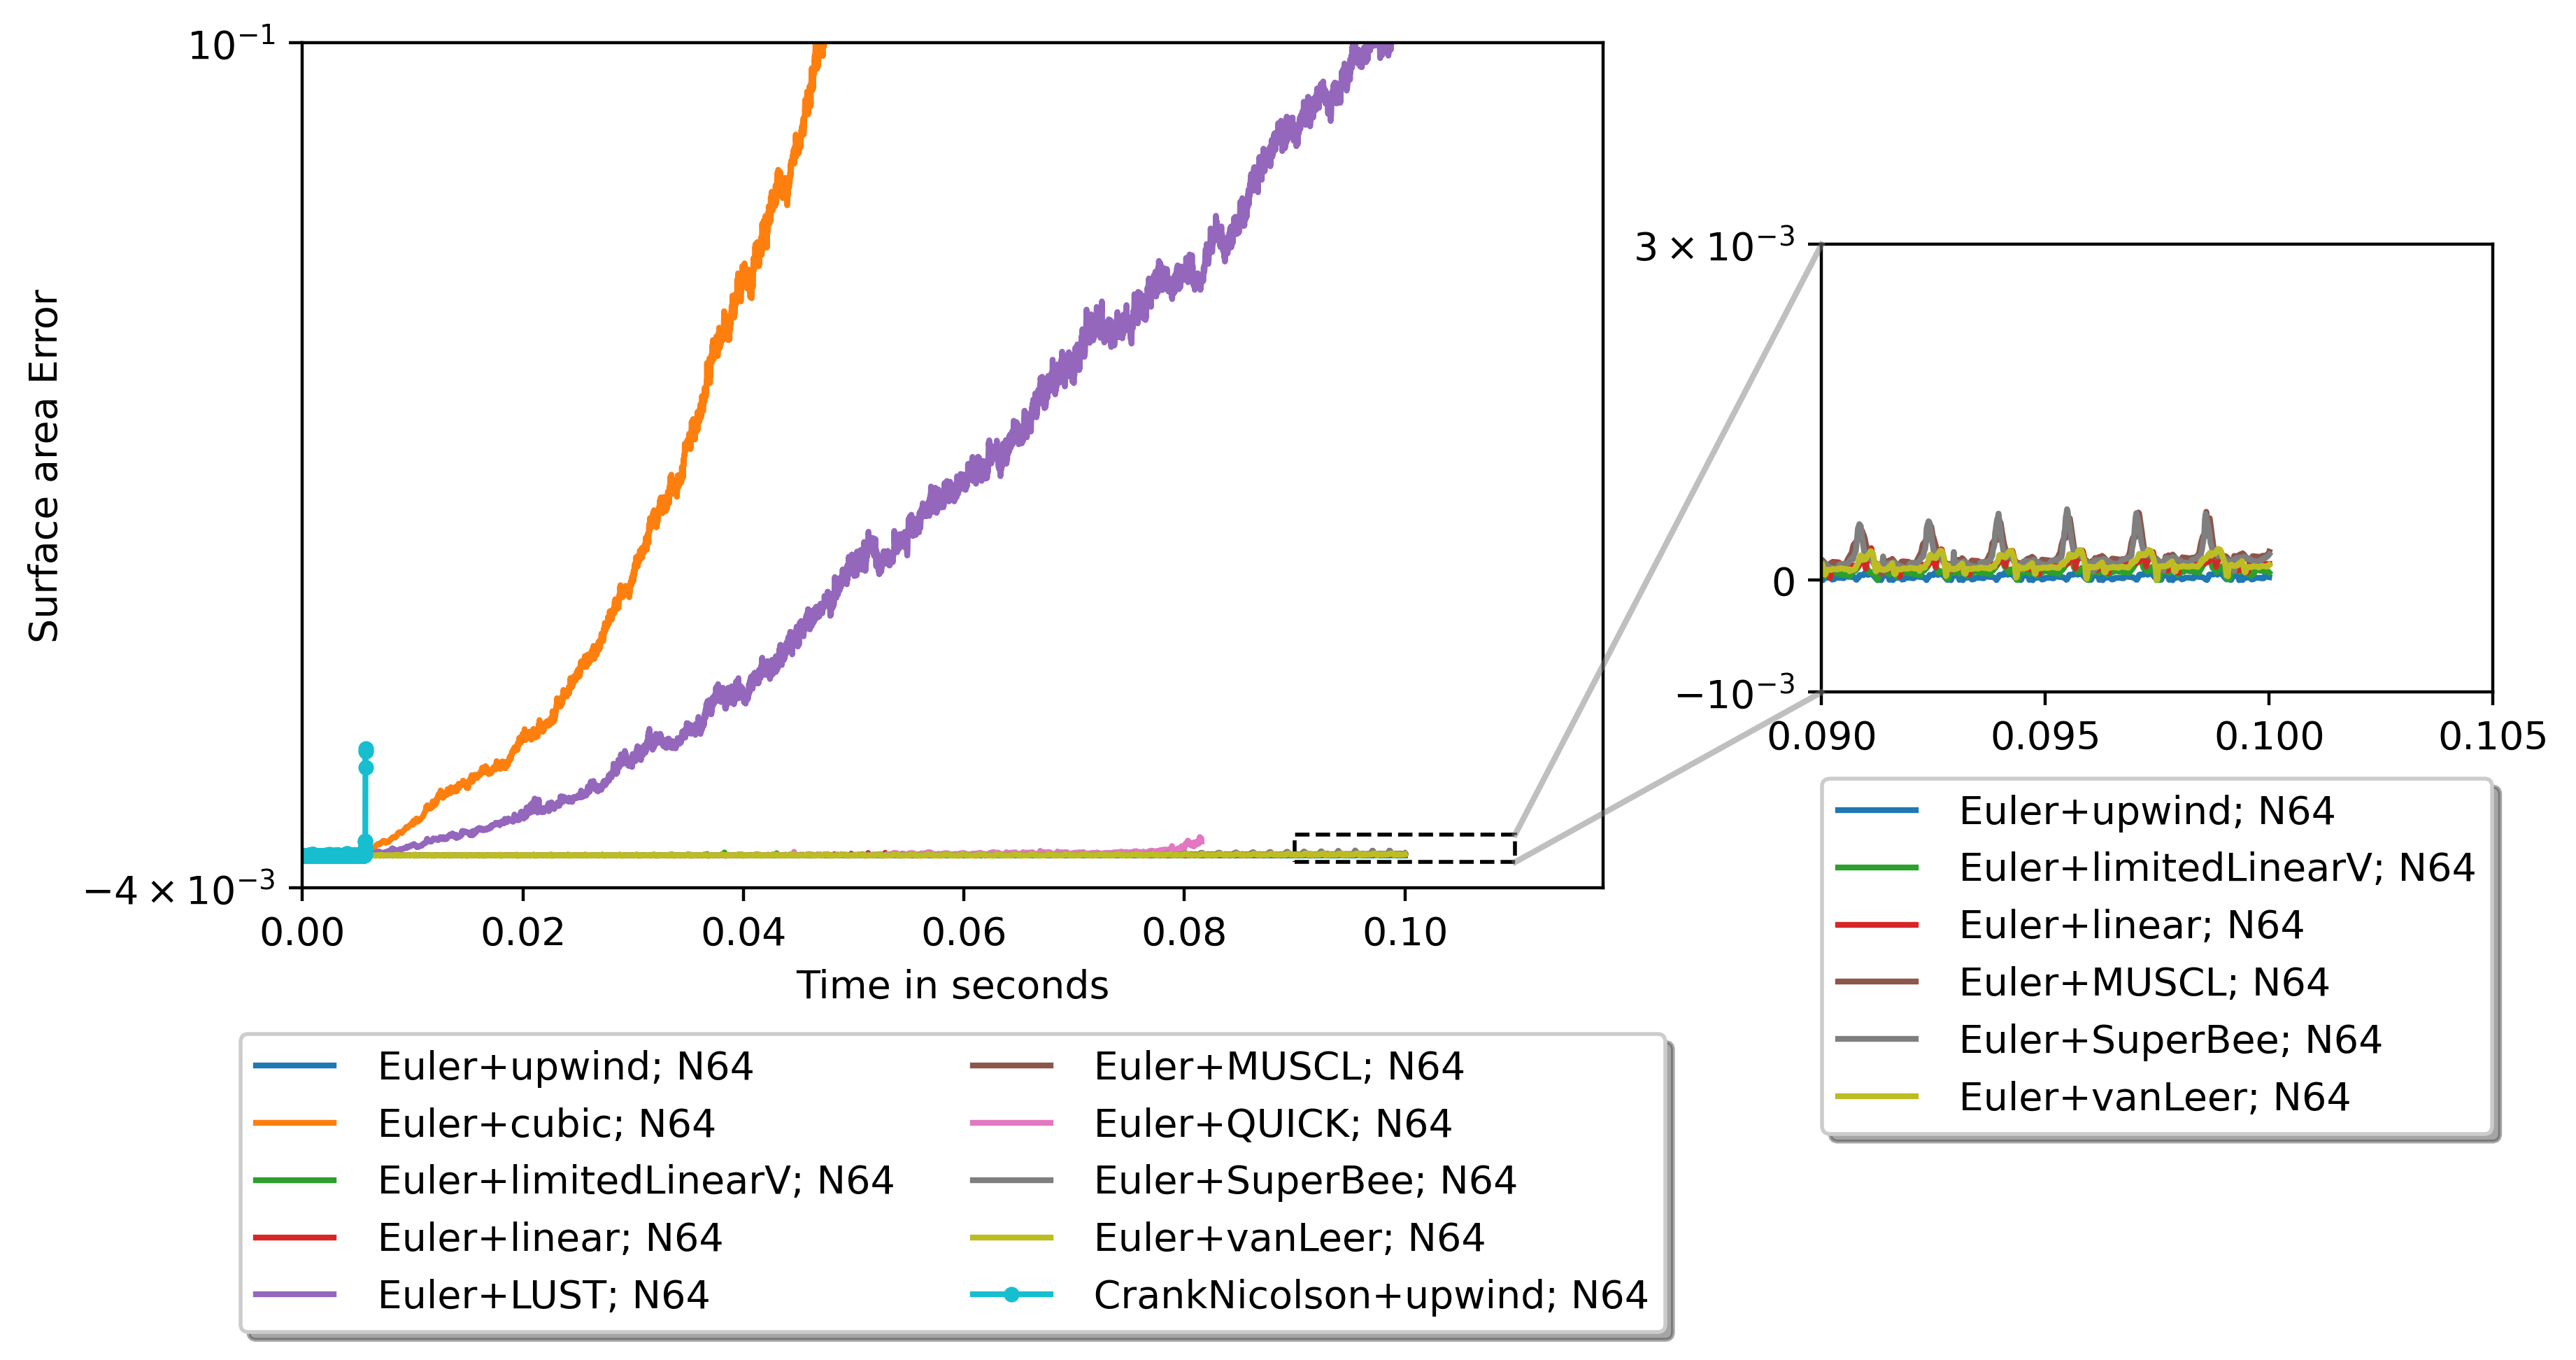

In [7]:
dframe_Rerun_isoAdv_Euler_N64_CN = dframe_NewU_isoAdv_bubblepproc.loc[((dframe_NewU_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'Euler')) 
                                            | ((dframe_NewU_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'CrankNicolson') & (dframe_NewU_isoAdv_bubblepproc.index.get_level_values('fluxSchemes') == 'upwind'))]                                          

plot_schemes_dframe(dframe_Rerun_isoAdv_Euler_N64_CN,"bubbleAreaPLIC", "Surface area Error",-0.001,0.003,0.0008,-0.004,0.1,scalar="symlog",recWidth=0.0034,extraticks=[0])

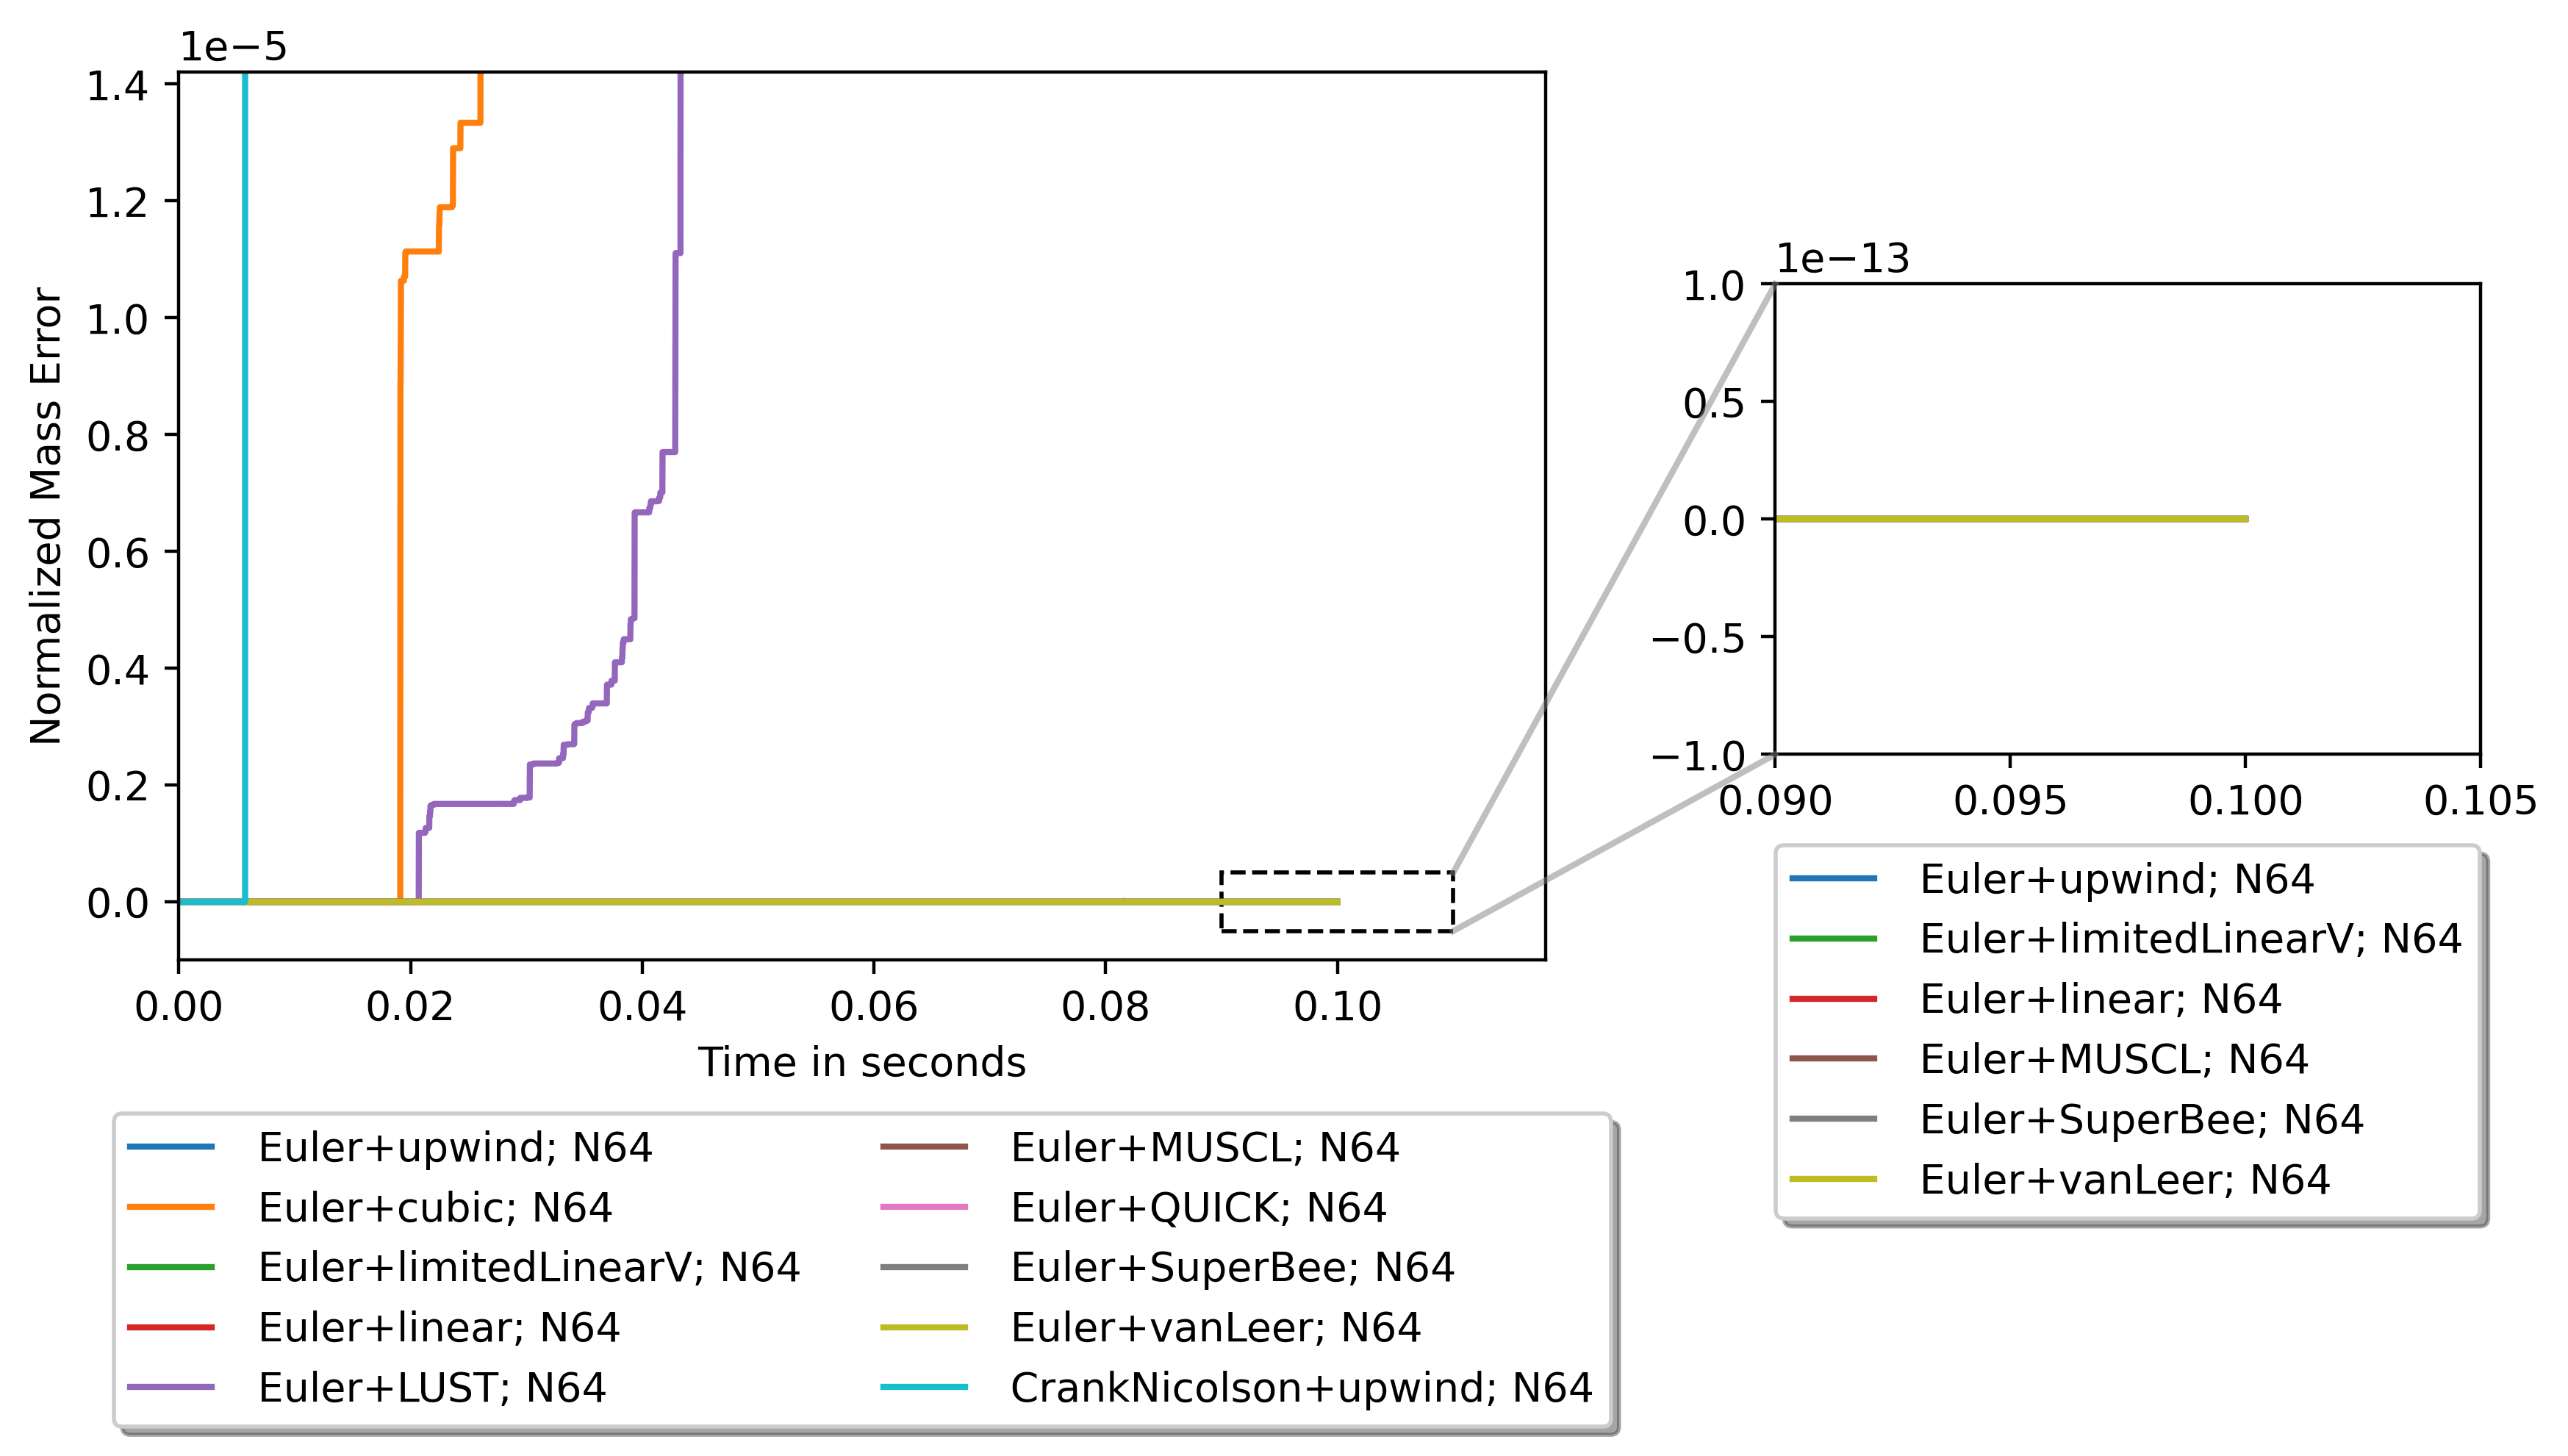

In [55]:
dframe_Rerun_isoAdv_Euler_N64_CN = dframe_NewU_isoAdv_bubblepproc.loc[((dframe_NewU_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'Euler')) 
                                            | ((dframe_NewU_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'CrankNicolson') & (dframe_NewU_isoAdv_bubblepproc.index.get_level_values('fluxSchemes') == 'upwind'))]                                          
plot_schemes_dframe(dframe_Rerun_isoAdv_Euler_N64_CN, "bubbleVolume", "Normalized Mass Error",-1e-13,1e-13,5e-7,-1e-6, 1.42e-5)

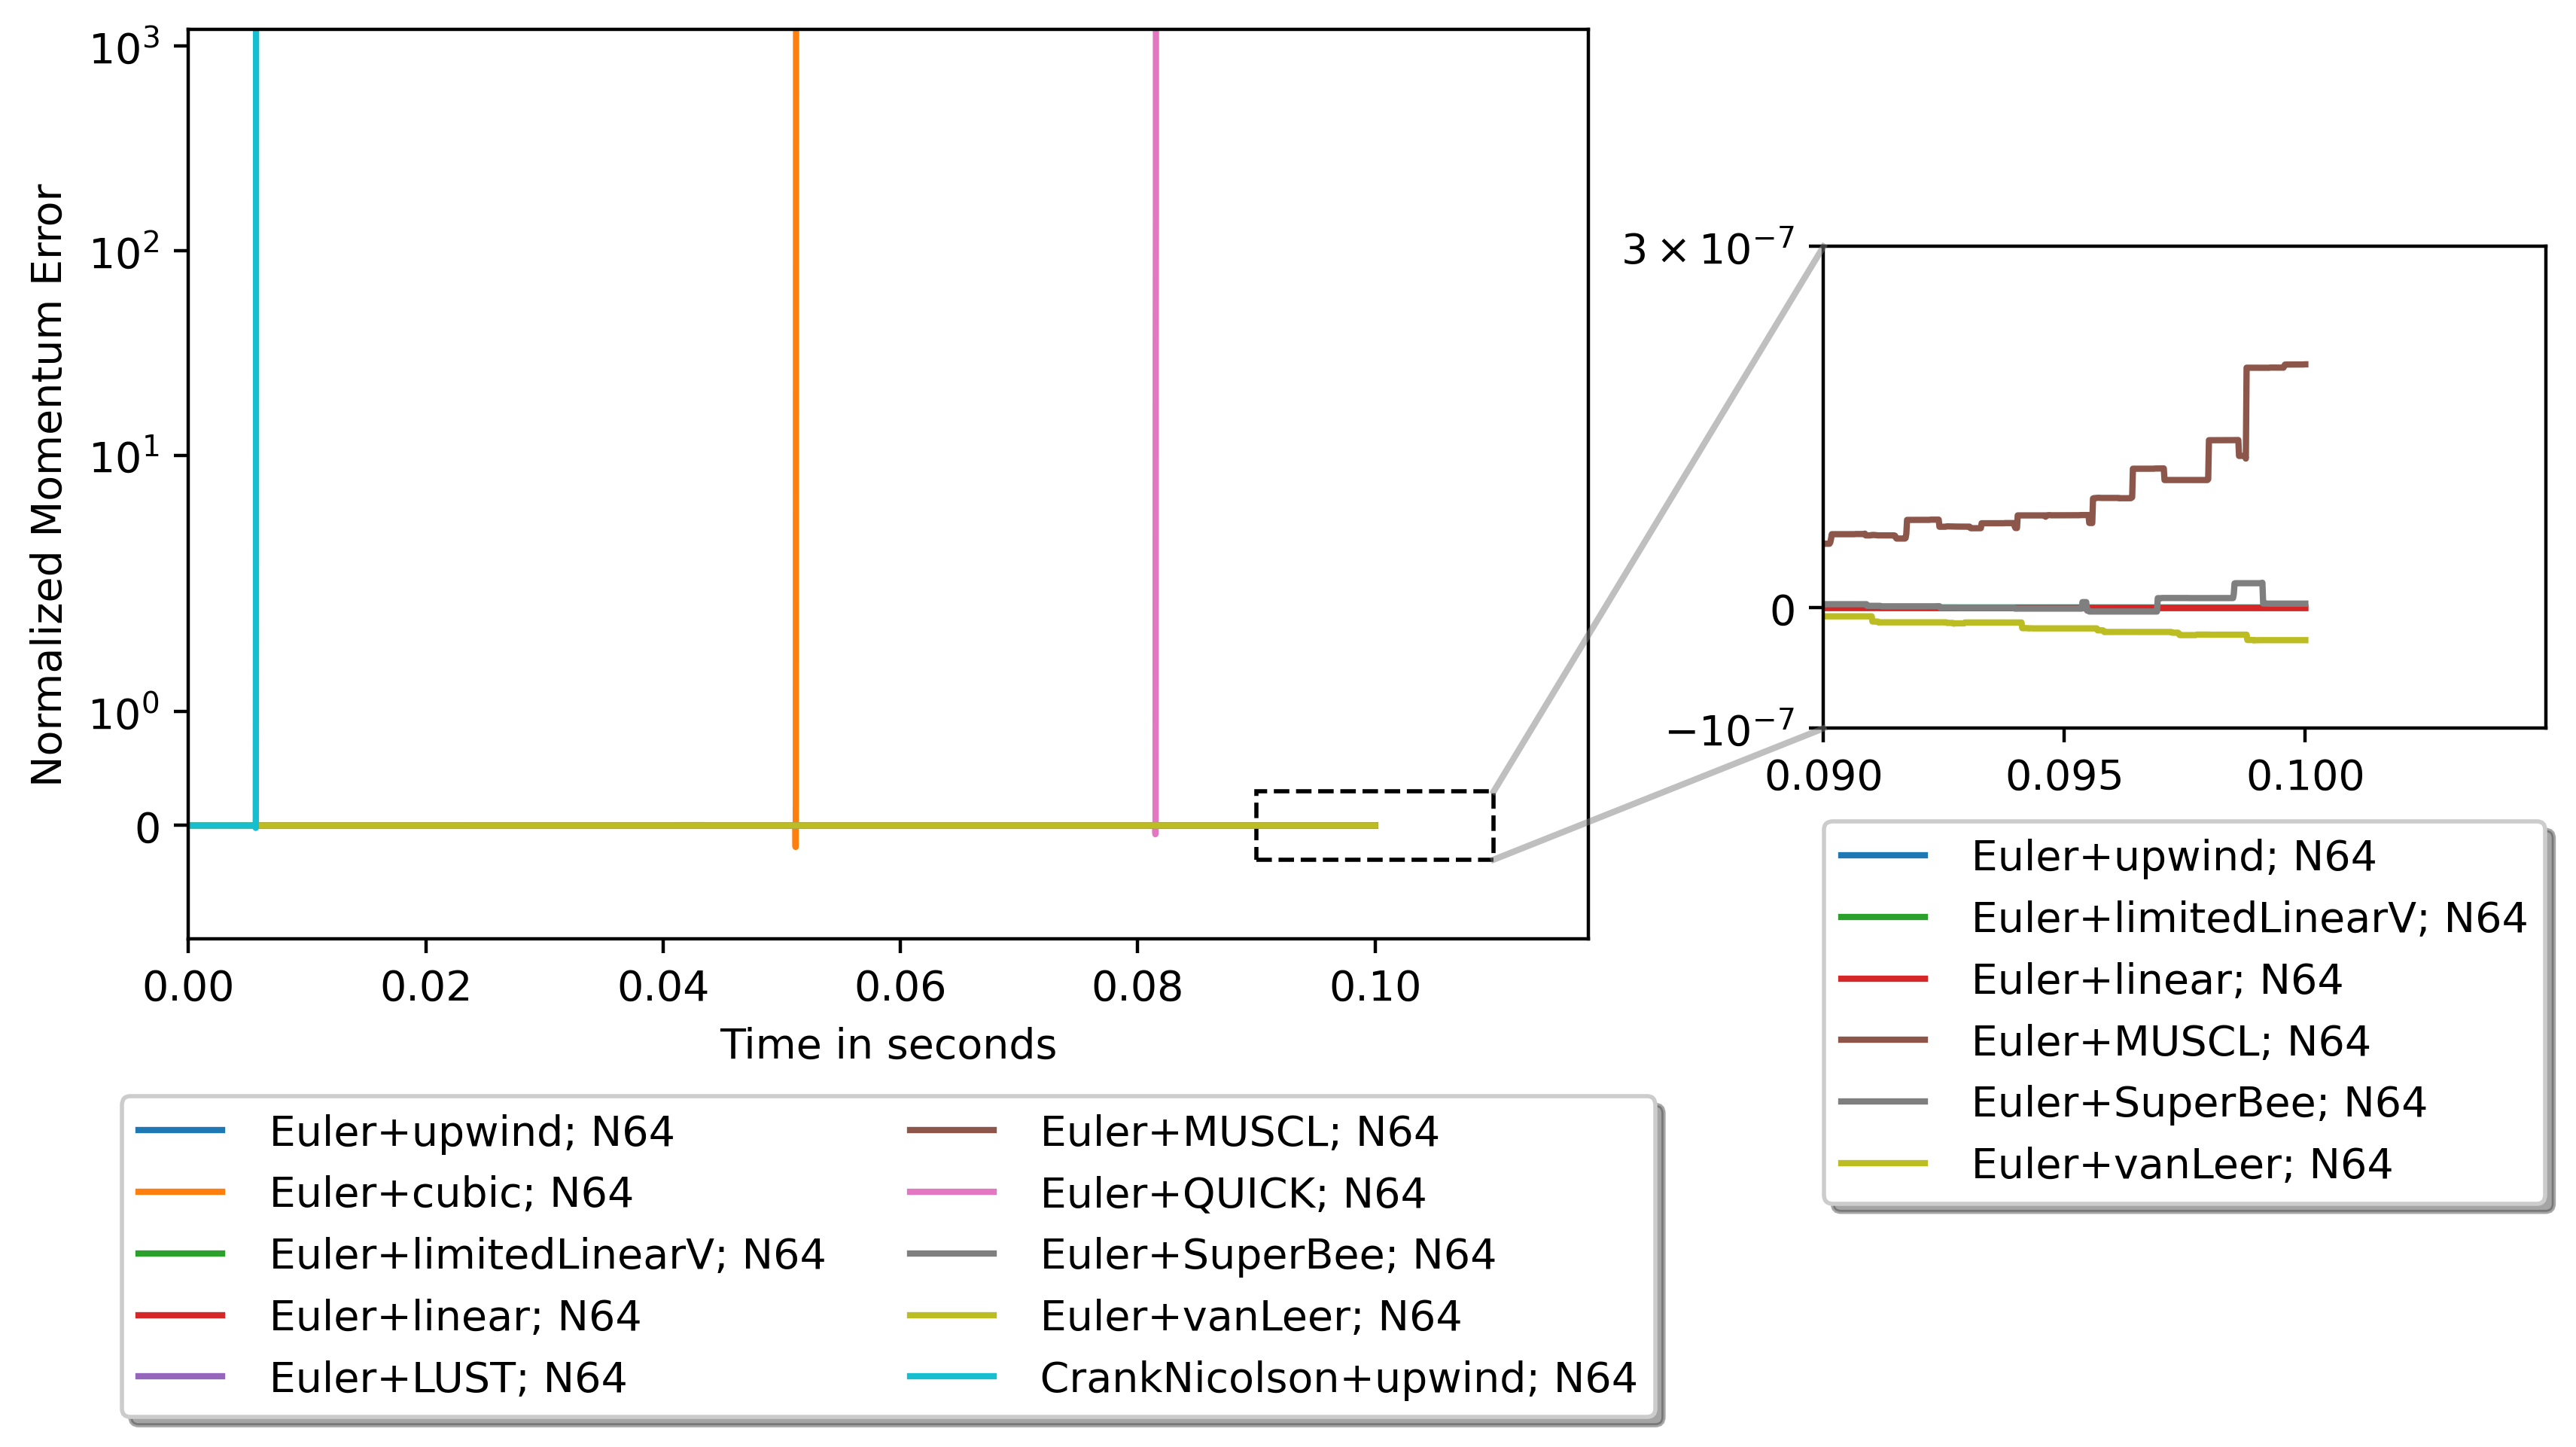

In [54]:
dframe_Rerun_isoAdv_Euler_N64_CN =dframe_NewU_isoAdv_SumMOM.loc[((dframe_NewU_isoAdv_SumMOM.index.get_level_values('timeSchemes') == 'Euler')) 
                                            | ((dframe_NewU_isoAdv_SumMOM.index.get_level_values('timeSchemes') == 'CrankNicolson') & (dframe_NewU_isoAdv_SumMOM.index.get_level_values('fluxSchemes') == 'upwind'))]                                          
plot_schemes_dframe(dframe_Rerun_isoAdv_Euler_N64_CN, "SumKinE3", "Normalized Momentum Error",-1e-7,3e-7,0.3,-1,1.2e3,"symlog",extraticks=[0])